In [108]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [109]:
np.random.seed(0)

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [112]:
assert(X_train.shape[0] == y_train.shape[0]), "no. of img = no. of labels"
assert(X_test.shape[0] == y_test.shape[0]), "no. of img = no. of labels"
assert(X_train.shape[1:] == (28,28)), "dim of img are 28*28"
assert(X_test.shape[1:] == (28,28)), "dim of img are 28*28"

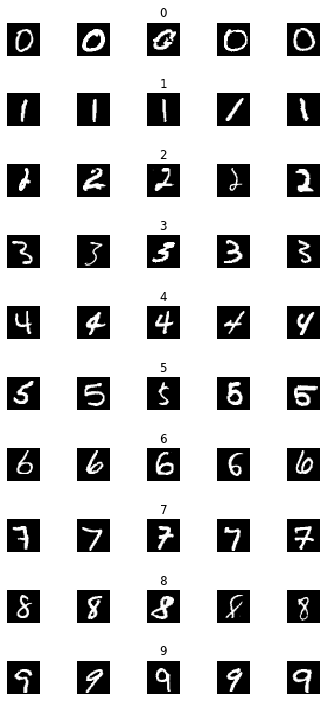

In [113]:
num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if  i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

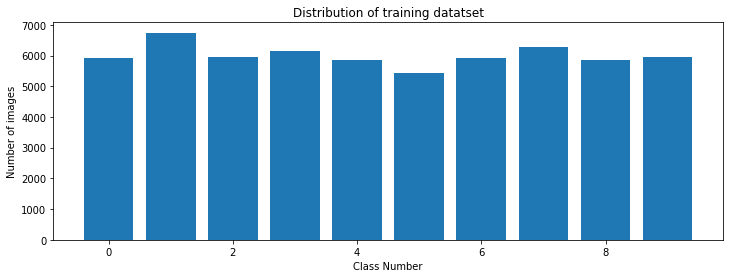

In [114]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training datatset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [115]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [116]:
X_train = X_train/255
X_test = X_test/255
# normalization

In [117]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

# Using DNN 

In [120]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [121]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
history = model.fit(X_train,y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 43us/step - loss: 1.2843 - acc: 0.5171 - val_loss: 1.0367 - val_acc: 0.6065
Epoch 2/10
54000/54000 [==============================] - 1s 26us/step - loss: 1.1163 - acc: 0.5884 - val_loss: 1.0532 - val_acc: 0.6283
Epoch 3/10
54000/54000 [==============================] - 1s 26us/step - loss: 1.0731 - acc: 0.6062 - val_loss: 1.0557 - val_acc: 0.5940
Epoch 4/10
54000/54000 [==============================] - 2s 28us/step - loss: 1.2703 - acc: 0.5747 - val_loss: 2.5830 - val_acc: 0.5148
Epoch 5/10
54000/54000 [==============================] - 1s 25us/step - loss: 1.4023 - acc: 0.5211 - val_loss: 2.5458 - val_acc: 0.4685
Epoch 6/10
54000/54000 [==============================] - 1s 24us/step - loss: 1.3799 - acc: 0.4742 - val_loss: 1.3623 - val_acc: 0.4515
Epoch 7/10
54000/54000 [==============================] - 1s 23us/step - loss: 1.4822 - acc: 0.4110 - val_loss: 1.4275 - val_acc:

Text(0.5, 0, 'epoch')

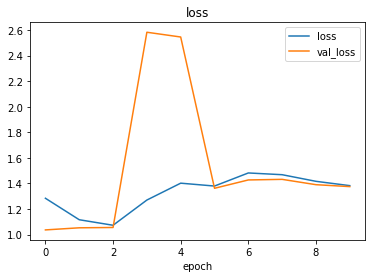

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

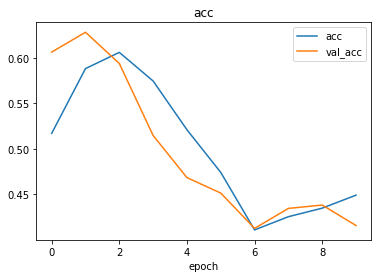

In [124]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')
plt.xlabel('epoch')

In [125]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score :', score[0])
print('Test accuracy :', score[1] )

Test score : 1.4127125019073485
Test accuracy : 0.4236


<Response [200]>


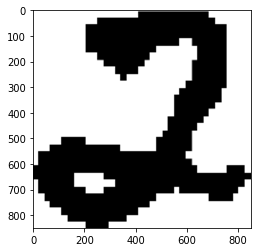

In [126]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

In [127]:
img_array = np.asarray(img)
print(img_array.shape)

(850, 850, 4)


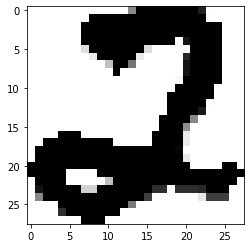

In [128]:
import cv2
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))

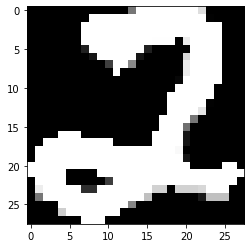

In [129]:
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [130]:
image = image/255
image = image.reshape(1,784)

In [131]:
prediction = model.predict_classes(image)

In [132]:
print("Predicted digit :", str(prediction))

Predicted digit : [2]
